<a href="https://colab.research.google.com/github/vitormnsousa/RSARP2020/blob/main/RASARP2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Análise ao RASARP 2020**
# Sistema AA

Dados: http://www.ersar.pt/pt/site-publicacoes/Paginas/edicoes-anuais-do-RASARP.aspx

In [102]:
#@title
import pandas as pd
import copy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
from scipy.stats.stats import pearsonr  
import scipy.stats 
import math

Dataset de indicadores e variáveis do RASARP

In [103]:
#@title
df_indicadores_2019_o = pd.read_excel('http://www.ersar.pt/_layouts/mpp/file-download.aspx?fileId=1706561',  sheet_name='Indicadores_2019')
df_dados_2019_o = pd.read_excel('http://www.ersar.pt/_layouts/mpp/file-download.aspx?fileId=1706561',  sheet_name='Dados_2019')

In [104]:
#@title
df_indicadores_2019 = df_indicadores_2019_o[(df_indicadores_2019_o['TipoSistema'] == 'Baixa') & (df_indicadores_2019_o['Valor'] != 'NR') & (df_indicadores_2019_o['RamoAtividade'] == 'AA') ].copy().drop(columns=['CodigoIndicador','Periodo','RamoAtividade', 'TipoSistema']).pivot_table(index='Empresa', columns='Indicador', values=['Valor'], aggfunc='first')
df_indicadores_2019.columns = df_indicadores_2019.columns.droplevel()
df_dados_2019 = df_dados_2019_o[(df_dados_2019_o['TipoSistema'] == 'Baixa') & (df_dados_2019_o['Valor'] != 'NR') & (df_dados_2019_o['RamoAtividade'] == 'AA') ].copy().drop(columns=['CodigoVariavel','Periodo','RamoAtividade', 'TipoSistema']).pivot_table(index='Empresa', columns='Variavel', values=['Valor'], aggfunc='first')
df_dados_2019.columns = df_dados_2019.columns.droplevel()

**Lista de Variáveis e Indicadores a analisar**

In [105]:
#@title
lista_indicadores = ['Cobertura dos gastos','Água não faturada','Ocorrência de avarias em condutas','Perdas reais de água','Tipologia da área de intervenção','Uso não autorizado','Perdas de água por erros de medição','Densidade de ramais']
df_indicadores_2019_analisar = df_indicadores_2019[lista_indicadores].apply(pd.to_numeric, errors='ignore')
lista_variaveis = ['Modelo de gestão','Comprimento total de condutas', 'Condutas reabilitadas nos últimos cinco anos','Ramais de ligação','Água não faturada','Perdas reais']
df_dados_2019_analisar = df_dados_2019[lista_variaveis].apply(pd.to_numeric, errors='ignore')
df_ind_var = pd.merge(df_indicadores_2019_analisar,df_dados_2019_analisar, on='Empresa', suffixes=(' %', ' m3'))
df_ind_var['Ramais de ligação log']  = np.log(df_ind_var['Ramais de ligação'])

**Análise de relação entre as variáveis numéricas**

In [106]:
#@title
df_ind_var_numericas = df_ind_var[['Cobertura dos gastos', 'Água não faturada %',
       'Ocorrência de avarias em condutas', 'Perdas reais de água',
        'Uso não autorizado','Perdas de água por erros de medição', 'Densidade de ramais',
        'Comprimento total de condutas', 'Ramais de ligação log',
       'Água não faturada m3', 'Perdas reais']].reset_index().drop('Empresa', axis=1)

In [ ]:
#@title
sns.set()
sns.pairplot(df_ind_var_numericas, height=7)

<Figure size 720x576 with 0 Axes>

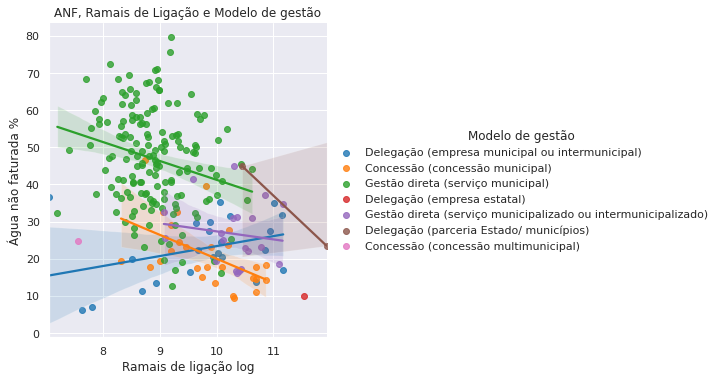

In [109]:
#@title
fig = plt.figure(figsize = (10, 8))
sns.set()
sns.lmplot(x='Ramais de ligação log' , y= 'Água não faturada %', data = df_ind_var, hue= 'Modelo de gestão' ,fit_reg=True, palette='tab10')   
plt.title('ANF, Ramais de Ligação e Modelo de gestão')
plt.show()

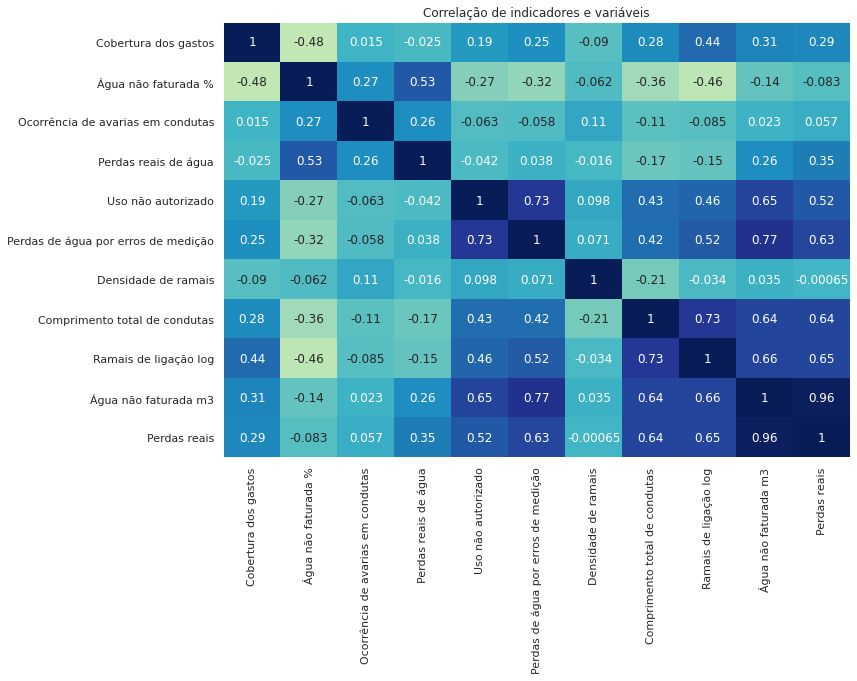

In [108]:
#@title
correlacao = df_ind_var_numericas.corr()
fig = plt.figure(figsize = (10, 8))
sns.heatmap(correlacao,center=0, annot=True, cmap="YlGnBu", cbar=False)
plt.title('Correlação de indicadores e variáveis')
plt.style.use('fivethirtyeight')
plt.show()

**Análise da Água Não faturada em função do Modelo de Gestão**

In [111]:
df_ind_var.groupby('Modelo de gestão')['Água não faturada m3'].describe().round()

,count,mean,std,min,25%,50%,75%,max
Modelo de gestão,,,,,,,,
Concessão (concessão multimunicipal),1.0,347526.0,NaN,347526.0,347526.0,347526.0,347526.0,347526.0
Concessão (concessão municipal),27.0,705672.0,654718.0,106797.0,321979.0,597958.0,739496.0,3074103.0
Delegação (empresa estatal),1.0,9032480.0,NaN,9032480.0,9032480.0,9032480.0,9032480.0,9032480.0
Delegação (empresa municipal ou intermunicipal),23.0,1494262.0,1440693.0,112306.0,499916.0,848094.0,1782574.0,5351181.0
Delegação (parceria Estado/ municípios),2.0,3753002.0,1852933.0,2442780.0,3097891.0,3753002.0,4408112.0,5063223.0
Gestão direta (serviço municipal),165.0,703295.0,728740.0,39171.0,266880.0,431073.0,781172.0,4429341.0
Gestão direta (serviço municipalizado ou intermunicipalizado),20.0,2542767.0,2501734.0,573185.0,807823.0,1542126.0,3287674.0,10514214.0


In [112]:
df_ind_var.groupby(by=['Modelo de gestão'])['Água não faturada %'].agg(['mean', 'count']).reset_index()

,Modelo de gestão,mean,count
0,Concessão (concessão multimunicipal),24.700000,1
1,Concessão (concessão municipal),21.218519,27
2,Delegação (empresa estatal),10.100000,1
3,Delegação (empresa municipal ou intermunicipal),22.652174,23
4,Delegação (parceria Estado/ municípios),34.250000,2
5,Gestão direta (serviço municipal),46.949697,165
6,Gestão direta (serviço municipalizado ou inter...,26.735000,20


In [113]:
df_ind_var.groupby(by=['Modelo de gestão'])['Água não faturada m3'].agg(['mean', 'count']).round().reset_index()

,Modelo de gestão,mean,count
0,Concessão (concessão multimunicipal),347526.0,1
1,Concessão (concessão municipal),705672.0,27
2,Delegação (empresa estatal),9032480.0,1
3,Delegação (empresa municipal ou intermunicipal),1494262.0,23
4,Delegação (parceria Estado/ municípios),3753002.0,2
5,Gestão direta (serviço municipal),703295.0,165
6,Gestão direta (serviço municipalizado ou inter...,2542767.0,20


Text(0, 0.5, 'Água Não Faturada')

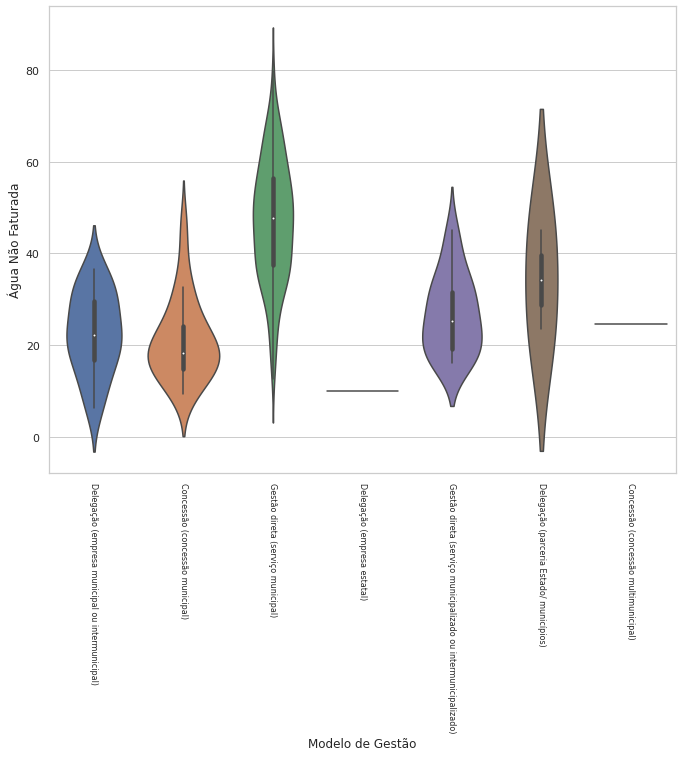

In [114]:
#@title
fig = plt.figure(figsize = (10, 8))
sns.set_style('whitegrid')
ax = sns.violinplot(x=df_ind_var['Modelo de gestão'], y=df_ind_var['Água não faturada %'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=-90,  fontsize = 8)
#sns.swarmplot(x=df_merge['Valor_x'], y=df_merge['Valor_y'], color="black")
plt.xlabel('Modelo de Gestão')
plt.ylabel('Água Não Faturada')

**Análise da Água Não faturada em função da Tipologia da Área de Intervenção**

Text(0, 0.5, 'Água Não Faturada')

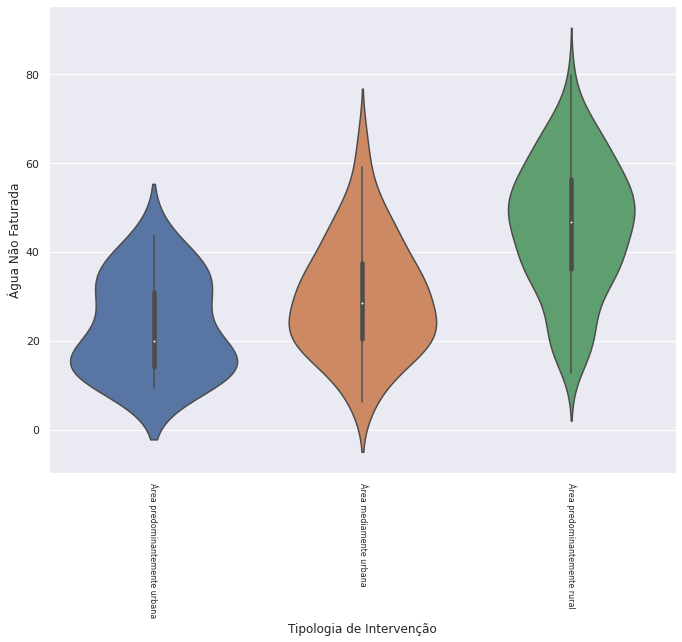

In [115]:
#@title
fig = plt.figure(figsize = (10, 8))
sns.set_style('darkgrid')
ax = sns.violinplot(x=df_ind_var['Tipologia da área de intervenção'], y=df_ind_var['Água não faturada %'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=-90,  fontsize = 8)
#sns.swarmplot(x=df_merge['Valor_x'], y=df_merge['Valor_y'], color="black")
plt.xlabel('Tipologia de Intervenção')
plt.ylabel('Água Não Faturada')

Gráfico de  

Text(0, 0.5, 'Água Não Faturada')

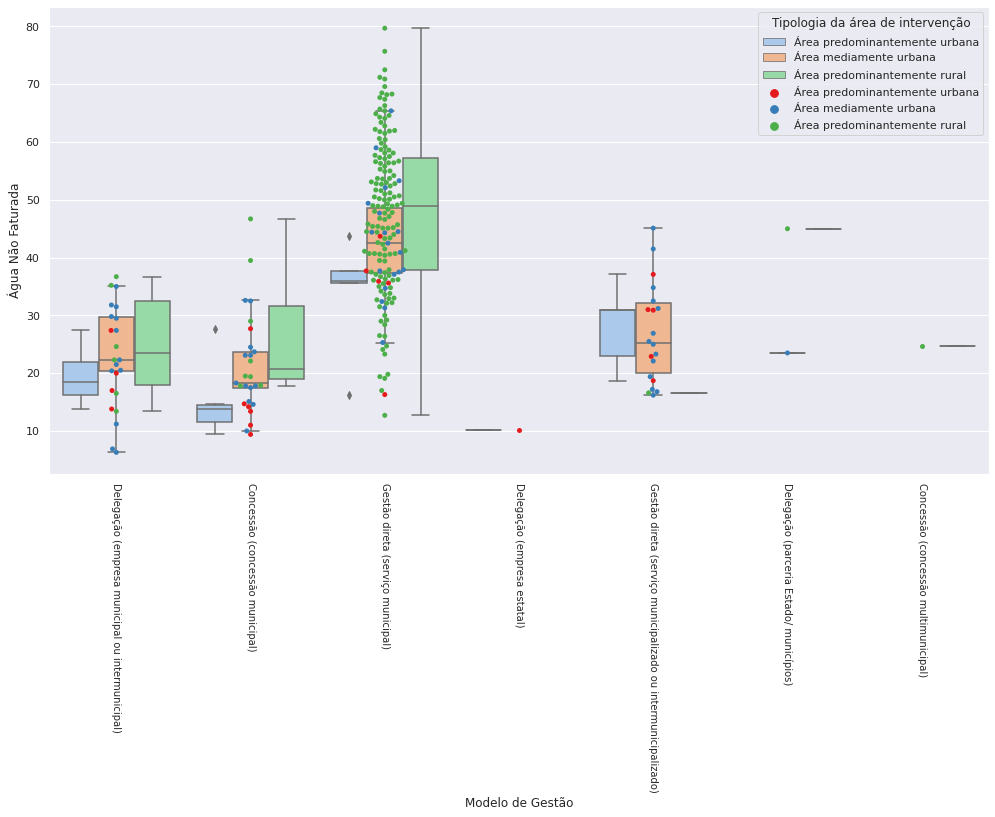

In [116]:
#@title
fig = plt.figure(figsize = (15, 8))
ax = sns.boxplot(x=df_ind_var['Modelo de gestão'], y=df_ind_var['Água não faturada %'], hue =df_ind_var['Tipologia da área de intervenção'], palette='pastel')
ax.set_xticklabels(ax.get_xticklabels(),rotation=-90,  fontsize = 10)
sns.swarmplot(x=df_ind_var['Modelo de gestão'], y=df_ind_var['Água não faturada %'], hue =df_ind_var['Tipologia da área de intervenção'], palette="Set1", color="black")
plt.xlabel('Modelo de Gestão')
plt.ylabel('Água Não Faturada')

**Gráfico de Densidade e Histograma da ANF**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


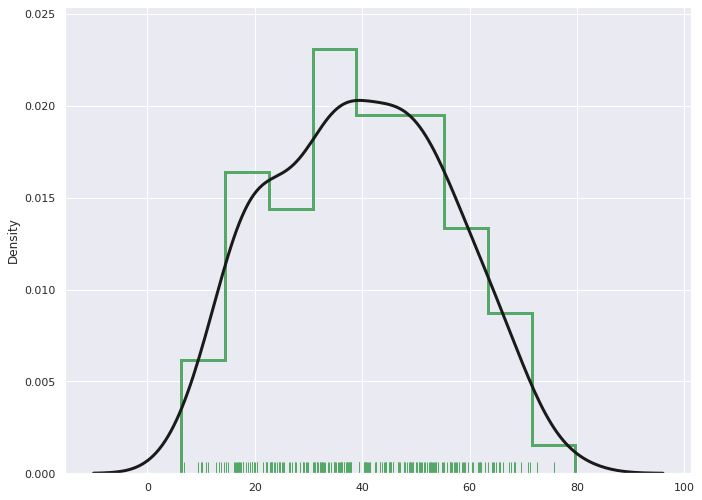

In [117]:
#@title
fig = plt.figure(figsize = (10, 8))
sns.set_style('darkgrid')
sns.distplot(x=df_ind_var['Água não faturada %'],rug=True, rug_kws={"color": "g"},
                 kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"} )

**As entidades com ANF mais baixa e mais alta**

In [118]:
df_ANF = df_ind_var['Água não faturada %'].dropna().reset_index().sort_values(by=['Água não faturada %'],ascending=True)

In [119]:
#@title
df_ANF = df_ind_var['Água não faturada %'].dropna().reset_index().sort_values(by=['Água não faturada %'],ascending=True)
ANF_best = df_ANF.head(20).reset_index()
ANF_worst  = df_ANF.tail(20).reset_index()
posicao_gondomar = ANF_best.Empresa[ANF_best.Empresa == 'Águas de Gondomar'].index.to_list()

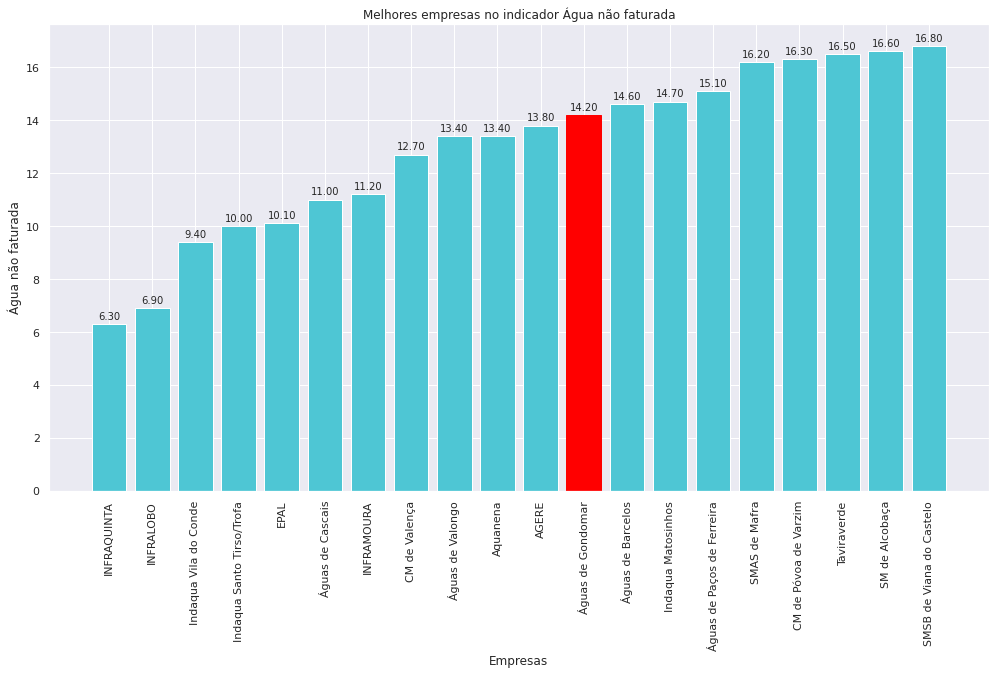

In [120]:
#@title
empresas = ANF_best['Empresa']
ANF = ANF_best['Água não faturada %']
figure, axes = plt.subplots(figsize = (15, 8))
cl = plt.bar(empresas,ANF, color = '#4ec6d4')
cl[posicao_gondomar[0]].set_color('red')
for bar in axes.patches: 
   axes.annotate(format(bar.get_height(), '.2f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=10, xytext=(0, 8), 
                   textcoords='offset points') 
plt.xticks(rotation='vertical')
plt.xlabel('Empresas')
plt.ylabel('Água não faturada')
plt.title('Melhores empresas no indicador Água não faturada')
plt.show()

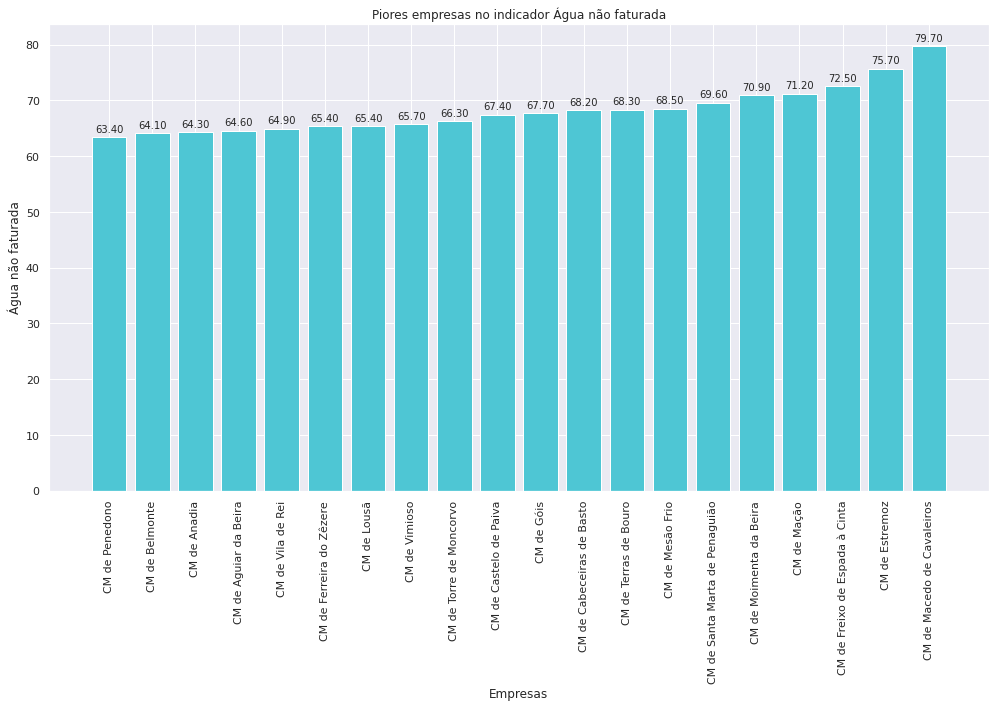

In [121]:
#@title
empresas = ANF_worst['Empresa']
ANF = ANF_worst['Água não faturada %']
figure, axes = plt.subplots(figsize = (15, 8))
cl = plt.bar(empresas,ANF, color = '#4ec6d4')
for bar in axes.patches: 
   axes.annotate(format(bar.get_height(), '.2f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=10, xytext=(0, 8), 
                   textcoords='offset points') 
plt.xticks(rotation='vertical')
plt.xlabel('Empresas')
plt.ylabel('Água não faturada')
plt.title('Piores empresas no indicador Água não faturada')
plt.show()
plt.show()

In [122]:
ANF_best_worst = pd.concat([ANF_best, ANF_worst]).reset_index().sort_values(by=['Água não faturada %'],ascending=True)

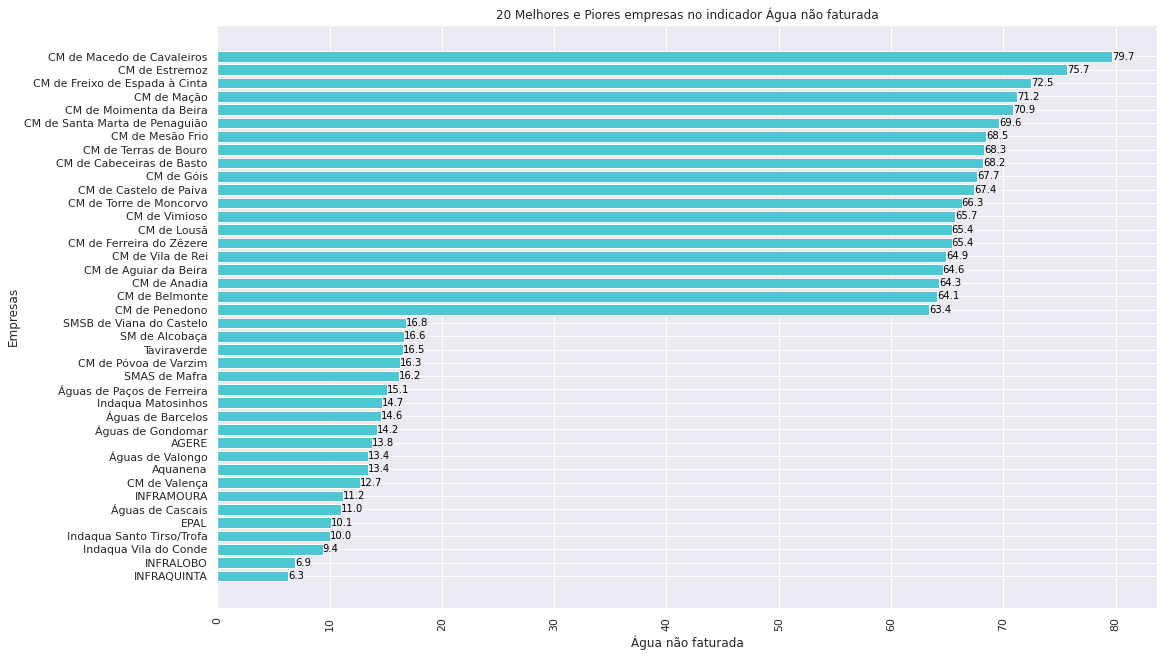

In [145]:
#@title
empresas = ANF_best_worst['Empresa']
ANF = ANF_best_worst['Água não faturada %']
figure, axes = plt.subplots(figsize = (15, 10))
cl = plt.barh(empresas,ANF, color = '#4ec6d4')
for i, v in enumerate(ANF):
    axes.text(v, i, str(v), color='black', fontsize=10, va='center')
plt.xticks(rotation='vertical')
plt.ylabel('Empresas')
plt.xlabel('Água não faturada')
plt.title('20 Melhores e Piores empresas no indicador Água não faturada')
plt.show()

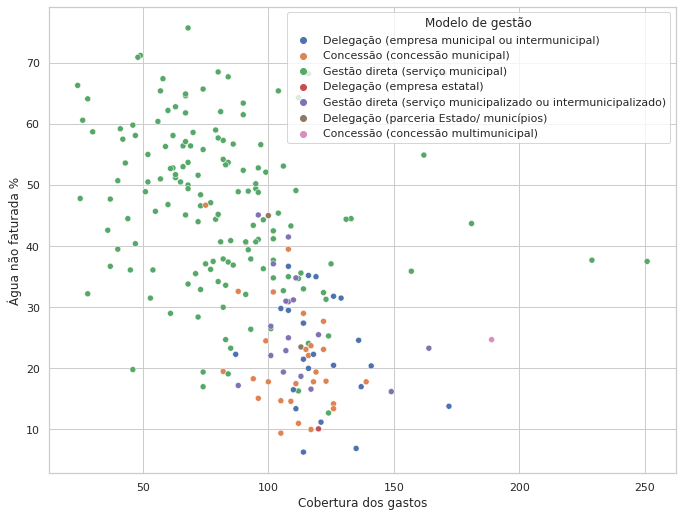

In [124]:
#@title
fig = plt.figure(figsize = (10, 8))
sns.set_theme(style="whitegrid")
ax = sns.scatterplot(x=df_ind_var['Cobertura dos gastos'], y=df_ind_var['Água não faturada %'], hue=df_ind_var['Modelo de gestão'])

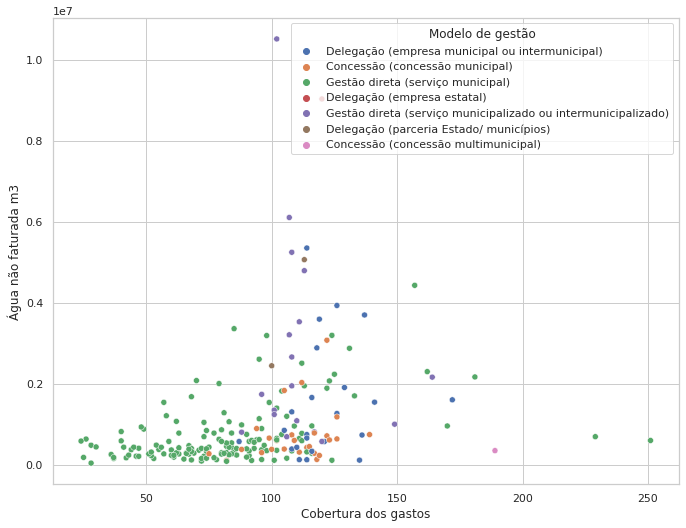

In [125]:
#@title
fig = plt.figure(figsize = (10, 8))
sns.set_theme(style="whitegrid")
ax = sns.scatterplot(x=df_ind_var['Cobertura dos gastos'], y=df_ind_var['Água não faturada m3'], hue=df_ind_var['Modelo de gestão'])

In [126]:
#remover NaN do dataset
df_ind_var_semNaN = df_ind_var.dropna()

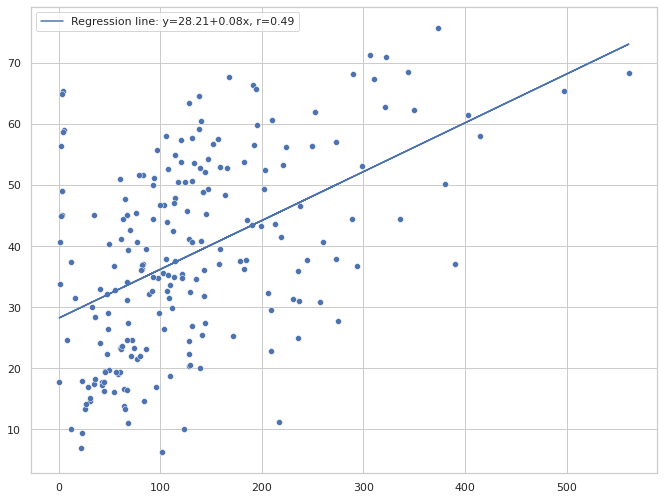

In [127]:
#@title
x = df_ind_var_semNaN['Perdas reais de água'].to_numpy(dtype='float64')
y= df_ind_var_semNaN['Água não faturada %'].to_numpy(dtype='float64')
slope, intercept, r, p, stderr = scipy.stats.linregress(x,y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
fig = plt.figure(figsize = (10, 8))
sns.set_theme(style="whitegrid")
ax = sns.scatterplot(x=x,y=y)
ax.plot(x, intercept + slope * x, label=line)
ax.legend(facecolor='white')

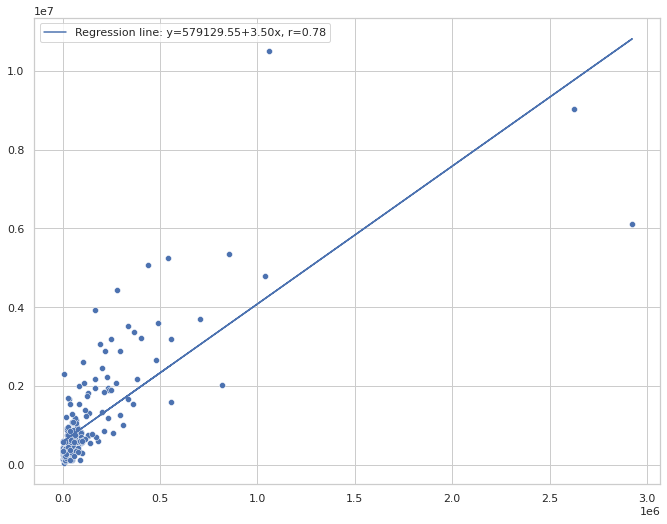

In [128]:
#@title
x = df_ind_var_semNaN['Perdas de água por erros de medição'].to_numpy(dtype='float64')
y= df_ind_var_semNaN['Água não faturada m3'].to_numpy(dtype='float64')
slope, intercept, r, p, stderr = scipy.stats.linregress(x,y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
fig = plt.figure(figsize = (10, 8))
sns.set_theme(style="whitegrid")
ax = sns.scatterplot(x=x,y=y)
ax.plot(x, intercept + slope * x, label=line)
ax.legend(facecolor='white')

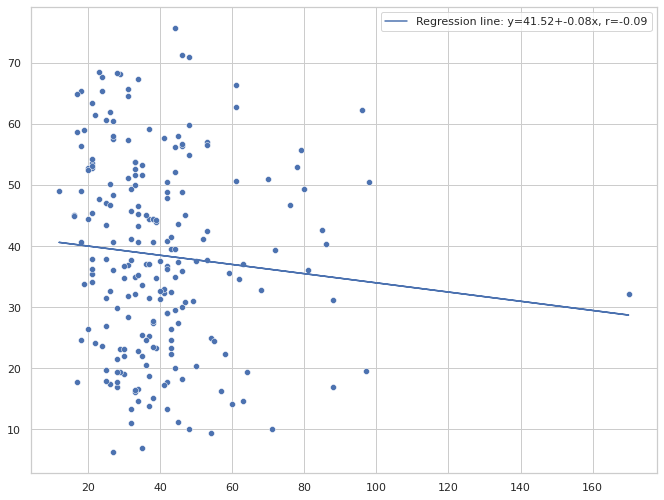

In [129]:
#@title
x = df_ind_var_semNaN['Densidade de ramais'].to_numpy(dtype='float64')
y= df_ind_var_semNaN['Água não faturada %'].to_numpy(dtype='float64')
slope, intercept, r, p, stderr = scipy.stats.linregress(x,y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
fig = plt.figure(figsize = (10, 8))
sns.set_theme(style="whitegrid")
ax = sns.scatterplot(x=x,y=y)
ax.plot(x, intercept + slope * x, label=line)
ax.legend(facecolor='white')

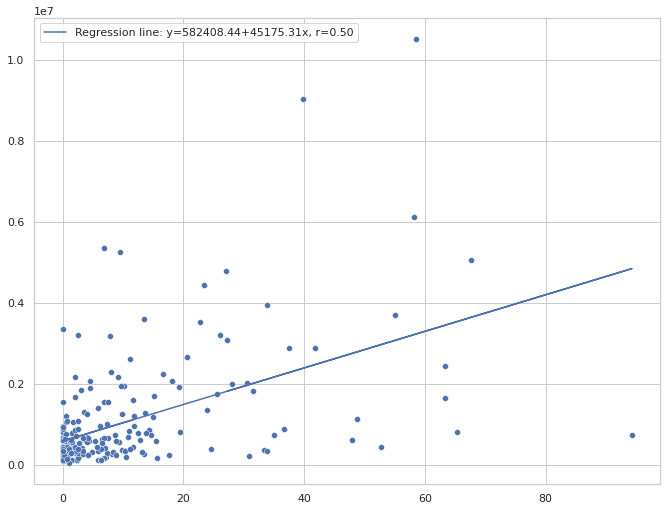

In [130]:
#@title
x = df_ind_var_semNaN['Condutas reabilitadas nos últimos cinco anos'].to_numpy(dtype='float64')
y= df_ind_var_semNaN['Água não faturada m3'].to_numpy(dtype='float64')
slope, intercept, r, p, stderr = scipy.stats.linregress(x,y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
fig = plt.figure(figsize = (10, 8))
sns.set_theme(style="whitegrid")
ax = sns.scatterplot(x=x,y=y)
ax.plot(x, intercept + slope * x, label=line)
ax.legend(facecolor='white')

**Água Não faturada por Ramal**

In [131]:
df_ind_var['ANF_RAMAL_ANO'] = df_ind_var['Água não faturada m3']/df_ind_var['Ramais de ligação']

In [132]:
df_ind_var.rename(columns={'Densidade de ramais': 'D_ramais'}, inplace=True)
df_ind_var_d20 = df_ind_var.query('D_ramais >= 20')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


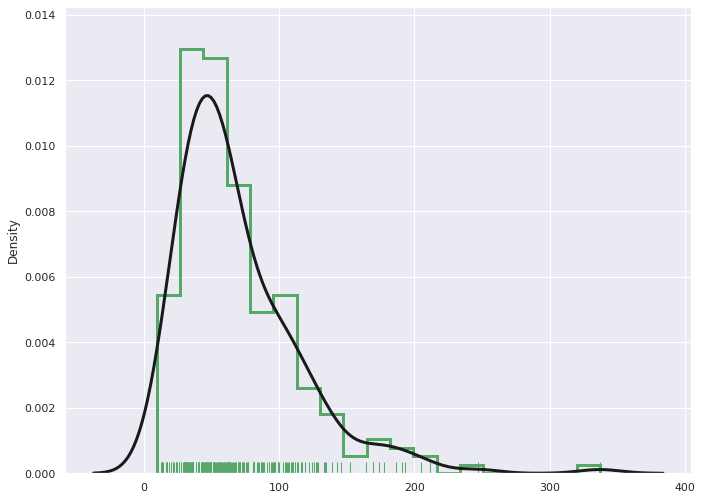

In [133]:
#@title
fig = plt.figure(figsize = (10, 8))
sns.set_style('darkgrid')
sns.distplot(x=df_ind_var_d20['ANF_RAMAL_ANO'],rug=True, rug_kws={"color": "g"},
                 kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"} )

In [134]:
df_ANF = df_ind_var['ANF_RAMAL_ANO'].dropna().reset_index().sort_values(by=['ANF_RAMAL_ANO'],ascending=True)
ANF_Ramal_best = df_ANF.head(20).reset_index()
ANF_Ramal_worst  = df_ANF.tail(20).reset_index()
posicao_gondomar = ANF_Ramal_best.Empresa[ANF_Ramal_best.Empresa == 'Águas de Gondomar'].index.to_list()

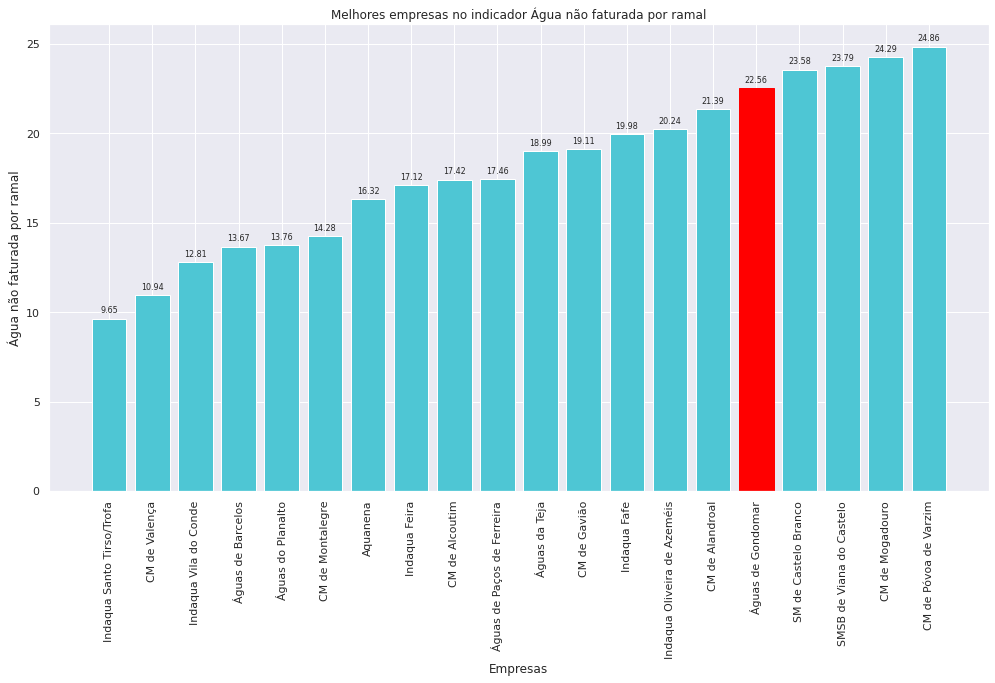

In [135]:
#@title
empresas = ANF_Ramal_best['Empresa']
ANF = ANF_Ramal_best['ANF_RAMAL_ANO']
figure, axes = plt.subplots(figsize = (15, 8))
cl = plt.bar(empresas,ANF, color = '#4ec6d4')
cl[posicao_gondomar[0]].set_color('red')
for bar in axes.patches: 
   axes.annotate(format(bar.get_height(), '.2f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=8, xytext=(0, 8), 
                   textcoords='offset points') 
plt.xticks(rotation='vertical')
plt.xlabel('Empresas')
plt.ylabel('Água não faturada por ramal')
plt.title('Melhores empresas no indicador Água não faturada por ramal')
plt.show()

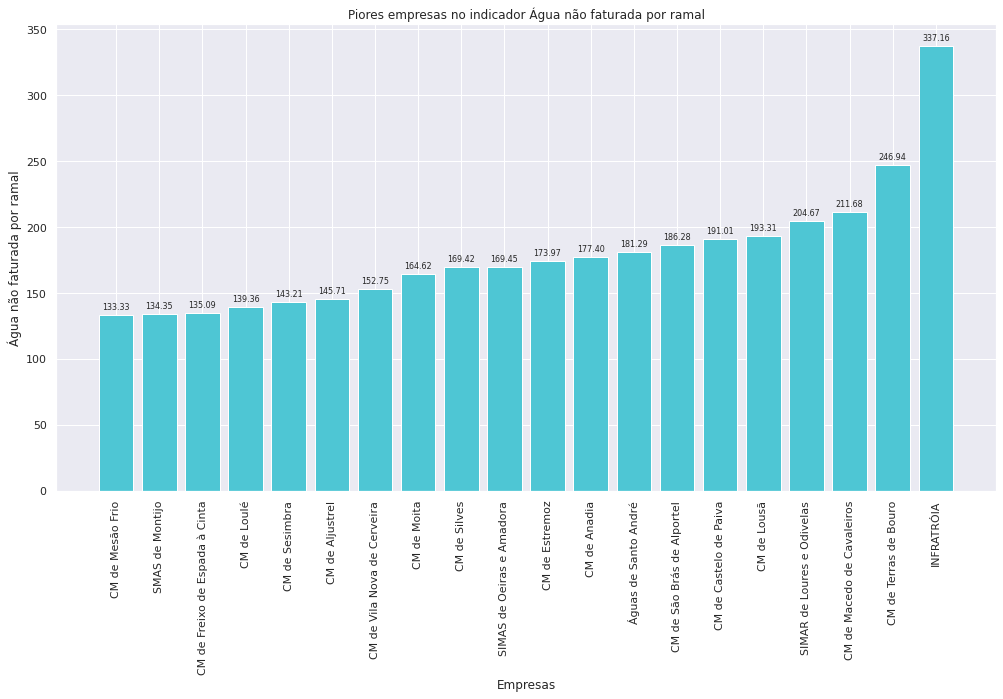

In [136]:
#@title
empresas = ANF_Ramal_worst['Empresa']
ANF = ANF_Ramal_worst['ANF_RAMAL_ANO']
figure, axes = plt.subplots(figsize = (15, 8))
cl = plt.bar(empresas,ANF, color = '#4ec6d4')
for bar in axes.patches: 
   axes.annotate(format(bar.get_height(), '.2f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=8, xytext=(0, 8), 
                   textcoords='offset points') 
plt.xticks(rotation='vertical')
plt.xlabel('Empresas')
plt.ylabel('Água não faturada por ramal')
plt.title('Piores empresas no indicador Água não faturada por ramal')
plt.show()

In [140]:
ANF_Ramal_best_worst = pd.concat([ANF_Ramal_best, ANF_Ramal_worst]).reset_index().sort_values(by=['ANF_RAMAL_ANO'],ascending=True)

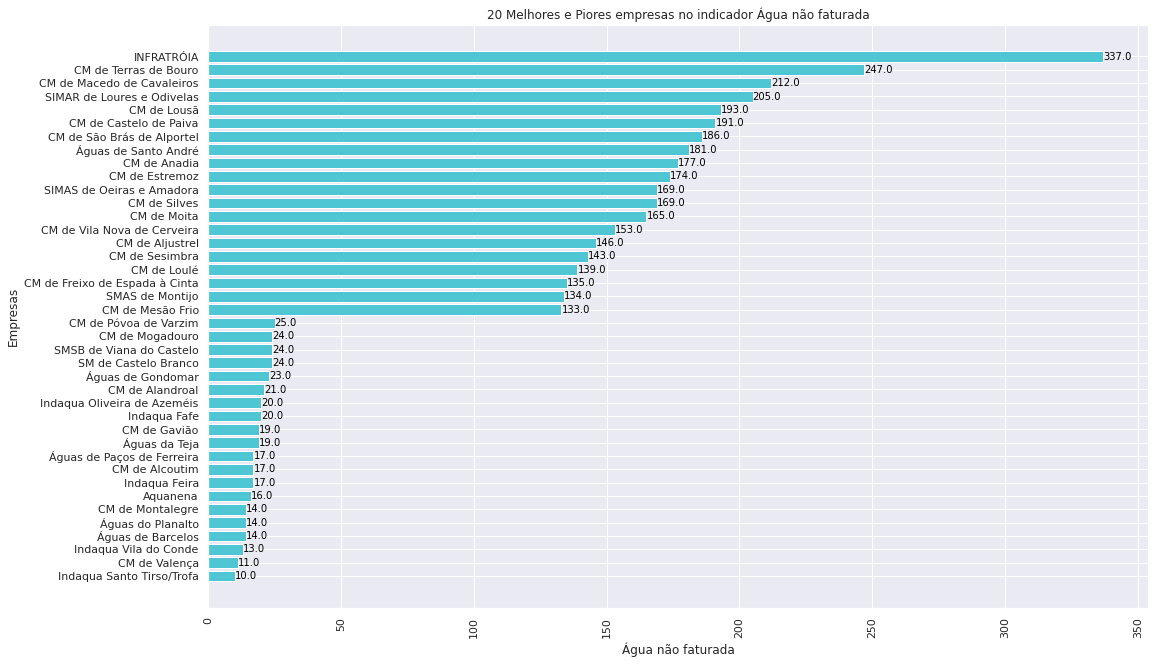

In [144]:
#@title
empresas = ANF_Ramal_best_worst['Empresa']
ANF = ANF_Ramal_best_worst['ANF_RAMAL_ANO'].round()
figure, axes = plt.subplots(figsize = (15, 10))
cl = plt.barh(empresas,ANF, color = '#4ec6d4')
for i, v in enumerate(ANF):
    axes.text(v, i, str(v), color='black', fontsize=10, va='center')
plt.xticks(rotation='vertical')
plt.ylabel('Empresas')
plt.xlabel('Água não faturada')
plt.title('20 Melhores e Piores empresas no indicador Água não faturada')
plt.show()